<a href="https://colab.research.google.com/github/thompf2/Machine-Learning-Engineering/blob/main/MLE_Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM #1:

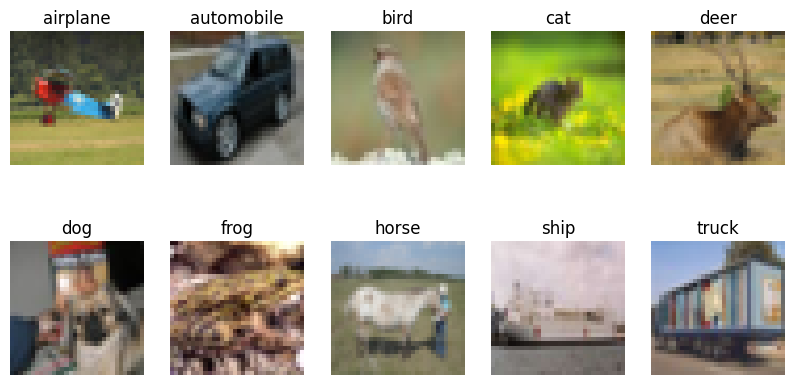

Training model with units=128, lr=0.001, batch_size=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model with units=128, lr=0.001, batch_size=64
Training model with units=128, lr=0.0005, batch_size=32
Training model with units=128, lr=0.0005, batch_size=64
Training model with units=256, lr=0.001, batch_size=32
Training model with units=256, lr=0.001, batch_size=64
Training model with units=256, lr=0.0005, batch_size=32
Training model with units=256, lr=0.0005, batch_size=64
Best parameters: (256, 0.0005, 64) with accuracy 0.4758


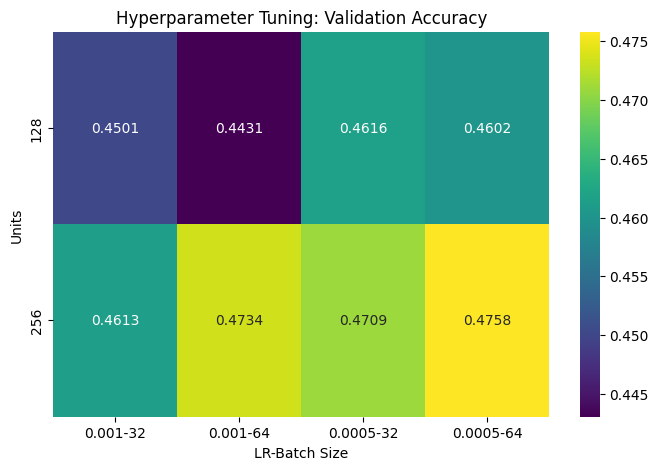

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.2646 - loss: 2.0243 - val_accuracy: 0.3839 - val_loss: 1.7637
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.3842 - loss: 1.7332 - val_accuracy: 0.4017 - val_loss: 1.6829
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.4160 - loss: 1.6426 - val_accuracy: 0.4361 - val_loss: 1.6021
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.4394 - loss: 1.5850 - val_accuracy: 0.4359 - val_loss: 1.5848
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.4504 - loss: 1.5469 - val_accuracy: 0.4502 - val_loss: 1.5513
Epoch 6/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.4675 - loss: 1.5099 - val_accuracy: 0.4659 - val_loss: 1.5149
Epoch 7/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.4712 - loss: 1.4844 - val_accuracy: 0.4511 - val_loss: 1.5413
Epoch 8/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.4837 - loss: 1.4507 - v

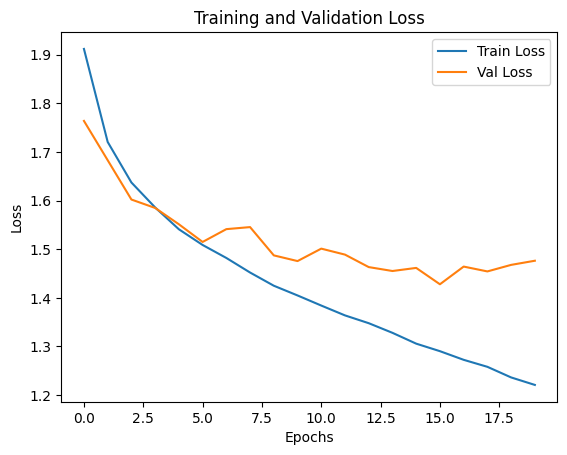

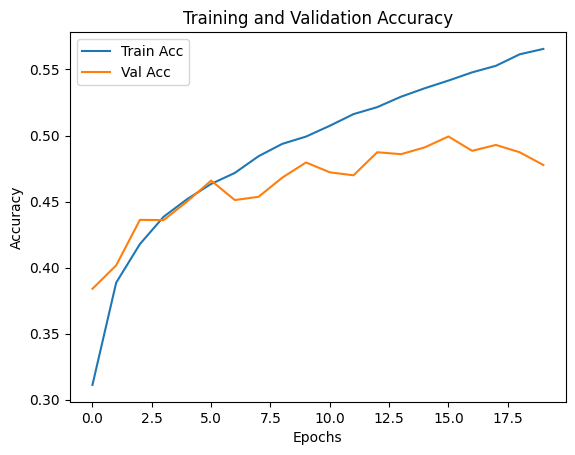

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from itertools import product
import seaborn as sns
import pandas as pd

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Train-validation split (70%-30%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=123, stratify=y_train)

# (a) Visualizing one image per category
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i in range(10):
    idx = np.where(y_train.argmax(axis=1) == i)[0][0]  # Find first occurrence
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.title(class_names[i])
    plt.axis('off')
plt.show()

# (b) Grid Search for Hyperparameter Tuning
param_grid = {
    'units': [128, 256],
    'learning_rate': [0.001, 0.0005],
    'batch_size': [32, 64]
}

best_acc = 0
best_params = None
history_dict = {}

for units, lr, batch_size in product(param_grid['units'], param_grid['learning_rate'], param_grid['batch_size']):
    print(f"Training model with units={units}, lr={lr}, batch_size={batch_size}")

    # Build FCNN Model
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),  # Flatten CIFAR-10 images
        Dense(units, activation='relu'),
        Dense(units // 2, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compile Model
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train Model
    history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_val, y_val), verbose=0)

    # Save history
    history_dict[(units, lr, batch_size)] = history.history

    # Check accuracy
    val_acc = max(history.history['val_accuracy'])
    if val_acc > best_acc:
        best_acc = val_acc
        best_params = (units, lr, batch_size)

print(f"Best parameters: {best_params} with accuracy {best_acc:.4f}")

# Extract results for visualization
units_list, lr_list, batch_size_list, val_acc_list = [], [], [], []

for (units, lr, batch_size), history in history_dict.items():
    units_list.append(units)
    lr_list.append(lr)
    batch_size_list.append(batch_size)
    val_acc_list.append(max(history['val_accuracy']))  # Best validation accuracy

# Convert results to DataFrame
df = pd.DataFrame({'Units': units_list, 'LR': lr_list, 'Batch Size': batch_size_list, 'Val Accuracy': val_acc_list})

# Heatmap of Validation Accuracy
heatmap_data = df.pivot(index='Units', columns=['LR', 'Batch Size'], values='Val Accuracy')

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".4f")
plt.title("Hyperparameter Tuning: Validation Accuracy")
plt.show()

# Train final model with best parameters
units, lr, batch_size = best_params

model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(units, activation='relu'),
    Dense(units // 2, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_data=(x_val, y_val))

# (c) Plot Training & Validation Loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# (d) Plot Training & Validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


PROBLEM #2:


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-9-de54c1cbf8ab>:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, names=column_names)


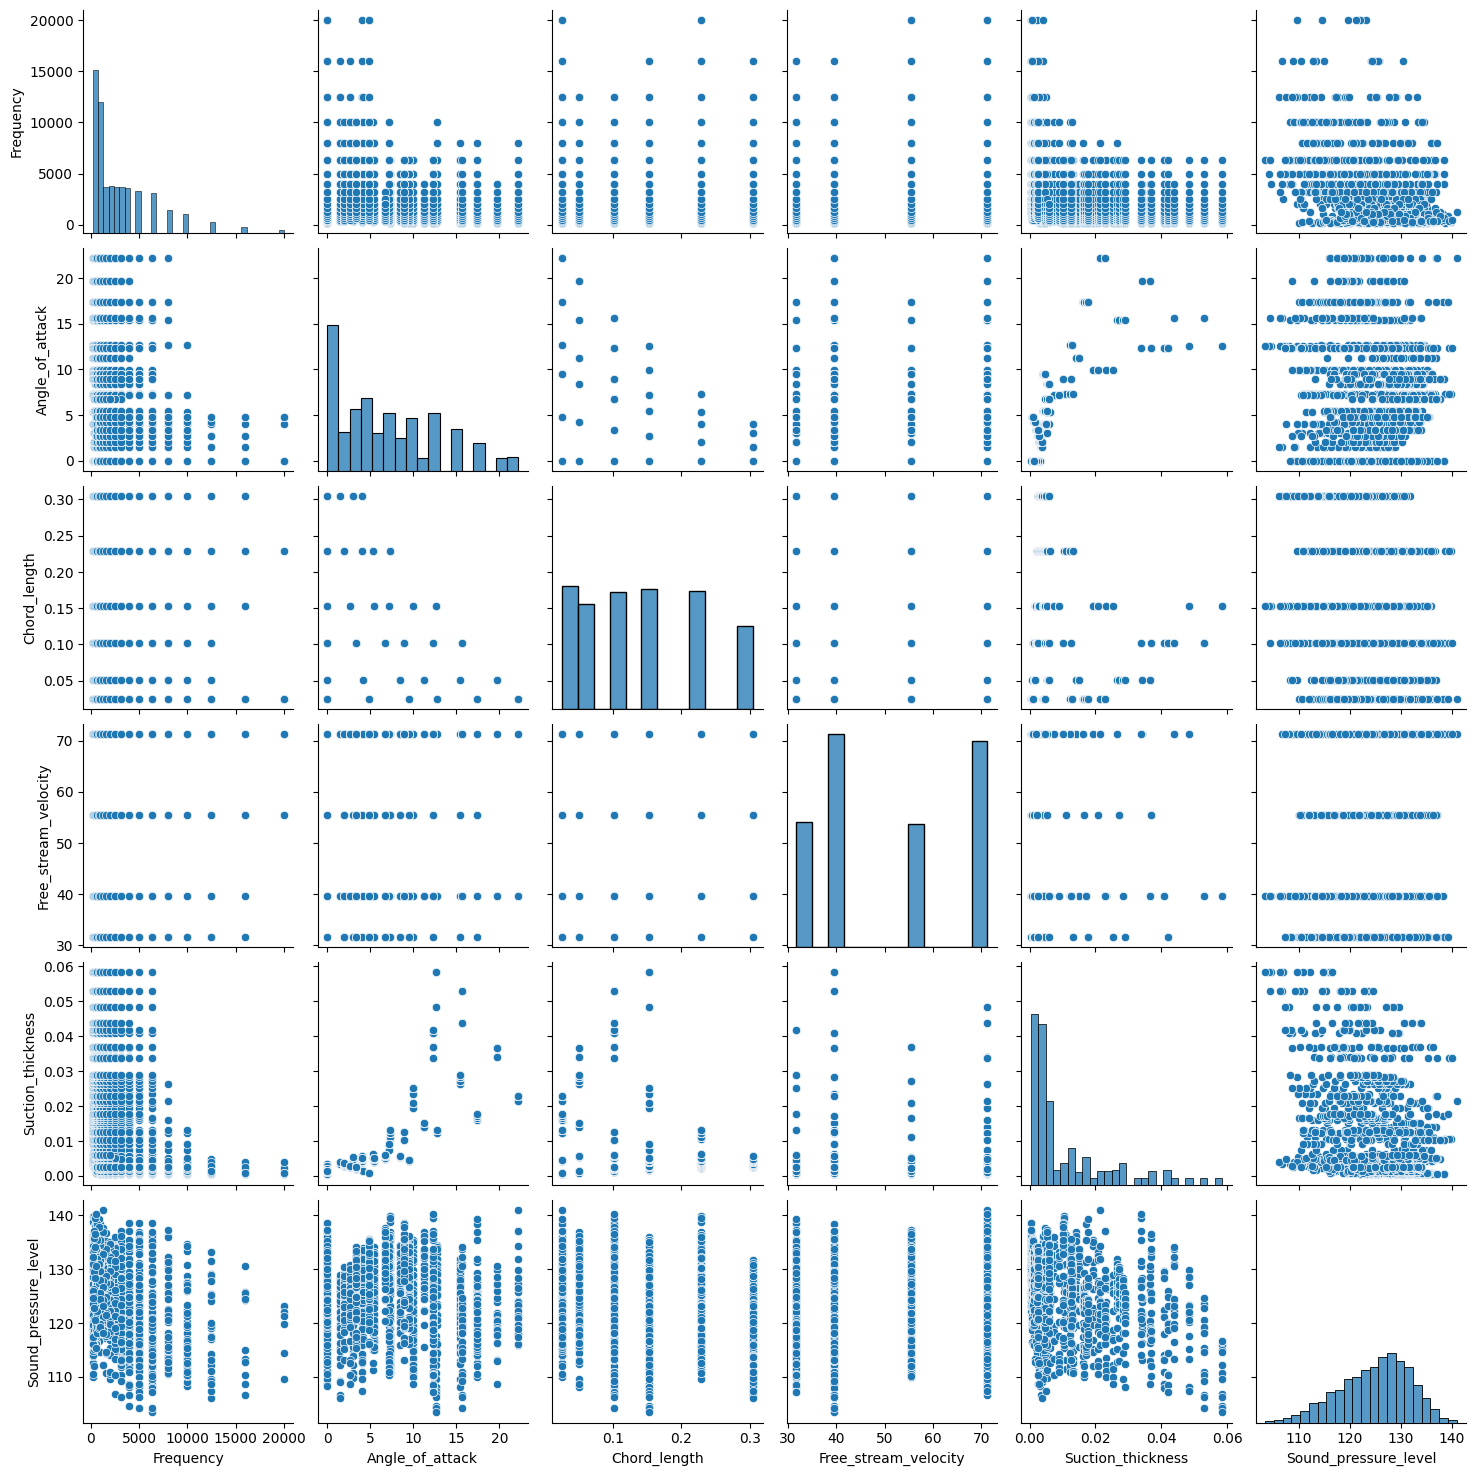

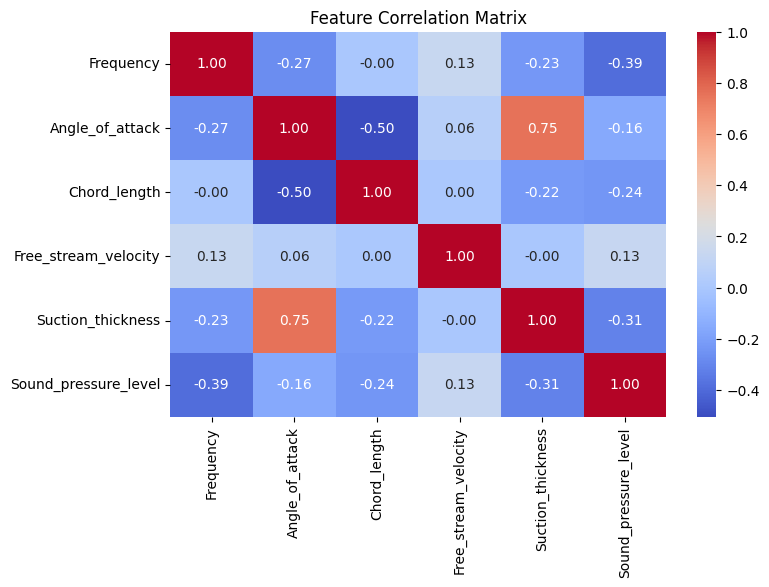

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 15442.6885 - val_loss: 10927.4590
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6695.4019 - val_loss: 632.6404
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 703.7642 - val_loss: 437.7833
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 435.5843 - val_loss: 351.8897
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 325.7437 - val_loss: 297.0601
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 287.1087 - val_loss: 249.8930
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 253.5813 - val_loss: 208.5462
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 187.9621 - val_loss: 178.2208
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 170.4318 - val_loss: 155.0063
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 136.0166 - val_loss: 131.5134
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 121.1790 - val_loss: 110.7166
Epoch 12/100
33/33 ━━━━━━

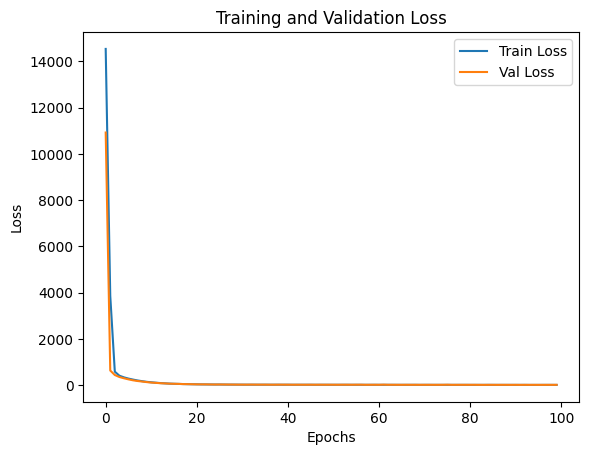

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Coefficient of Determination (R^2): 0.7159


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/My Drive/Machine Learning Engineering/airfoil_self_noise.txt'
column_names = ["Frequency", "Angle_of_attack", "Chord_length", "Free_stream_velocity", "Suction_thickness", "Sound_pressure_level"]
df = pd.read_csv(file_path, delim_whitespace=True, names=column_names)

# (a) Visualize the dataset
sns.pairplot(df)
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Prepare dataset for training
X = df.drop(columns=["Sound_pressure_level"])
y = df["Sound_pressure_level"]

# Train-validation split (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# (b) Construct a fully connected neural network
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer (no activation for regression)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# (c) Calculate R^2 score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Coefficient of Determination (R^2): {r2:.4f}")

